In [1]:
from importlib import reload
import utils as d; reload(d)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load data

In [2]:
df = d.load_dataset()

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Create X and Y

In [4]:
PREDICTED_COLUMNS = ['diagnosis']
FEATURES = ['mean']

In [5]:
x, y = d.create_xy(df, FEATURES, PREDICTED_COLUMNS)

In [6]:
x = d.preprocess_data(x)

## Split Train, Val & Test

In [7]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = d.split_train_val_test_sup(x, y, train_perc=0.6)

In [8]:
y_train_bool = [True if 'M' in o else False for o in y_train]
y_val_bool = [True if 'M' in o else False for o in y_val]
y_test_bool = [True if 'M' in o else False for o in y_test]

In [9]:
print('# Examples for training supervised methods:', len(x_train))
print('# Examples for validation:', len(x_val))
print('# Examples for test:',  len(x_test))

# Examples for training supervised methods: 235
# Examples for validation: 167
# Examples for test: 167


Bening Examples for Training:  214
Malignant Examples for Training:  21


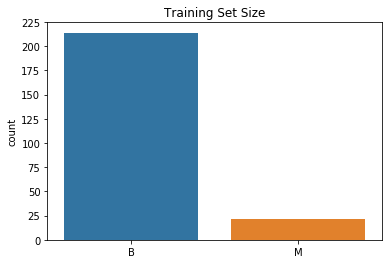

In [10]:
_, counts = np.unique(y_train, return_counts=True)
print("Bening Examples for Training: ", counts[0])
print("Malignant Examples for Training: ", counts[1])

ax = sns.countplot(y_train.reshape((-1,)), label="Count")
ax.set_title('Training Set Size')
plt.show()

## Features

### PCA

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
basis = pca.fit(x_train)

In [12]:
x_train = basis.transform(x_train)
x_val = basis.transform(x_val)
x_test = basis.transform(x_test)

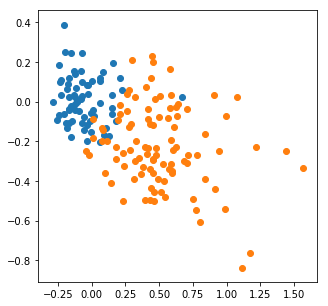

In [13]:
plt.figure(figsize=(5, 5))
plt.scatter(x_val[y_val[:, 0] == 'B', 0], x_val[y_val[:, 0] == 'B', 1])
plt.scatter(x_val[y_val[:, 0] == 'M', 0], x_val[y_val[:, 0] == 'M', 1])
plt.show()

## Supervised Models

In [14]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### Logistic Regression

In [15]:
model = LogisticRegression()
model.fit(x_train, y_train_bool)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_train_pred = model.predict(x_train)

In [17]:
print('Training Accuracy: %.1f%%' % (metrics.accuracy_score(y_train_pred, y_train_bool) * 100))

Training Accuracy: 93.6%


#### Validation

In [18]:
y_val_pred = model.predict(x_val)

In [19]:
print('Validation Accuracy: %.1f%%' % (metrics.accuracy_score(y_val_pred, y_val_bool) * 100))

Validation Accuracy: 65.9%


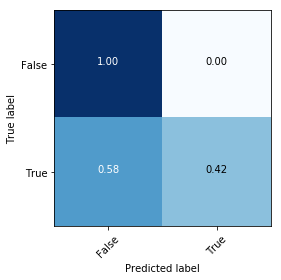

In [20]:
d.plot_confusion_matrix(metrics.confusion_matrix(y_val_bool, y_val_pred), [False, True])

#### Test

In [21]:
y_test_pred = model.predict(x_test)

In [22]:
print('Test Accuracy: %.1f%%' % (metrics.accuracy_score(y_test_pred, y_test_bool) * 100))

Test Accuracy: 64.7%


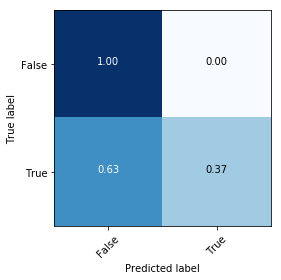

In [23]:
d.plot_confusion_matrix(metrics.confusion_matrix(y_test_bool, y_test_pred), [False, True])

### Random Forest

#### Train Model

In [24]:
model = RandomForestClassifier(n_estimators=5)
model.fit(x_train, y_train_bool)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
y_train_pred = model.predict(x_train)

In [26]:
print('Training Accuracy: %.1f%%' % (metrics.accuracy_score(y_train_pred, y_train_bool) * 100))

Training Accuracy: 100.0%


#### Validation

In [27]:
y_val_pred = model.predict(x_val)

In [28]:
print('Validation Accuracy: %.1f%%' % (metrics.accuracy_score(y_val_pred, y_val_bool) * 100))

Validation Accuracy: 80.2%


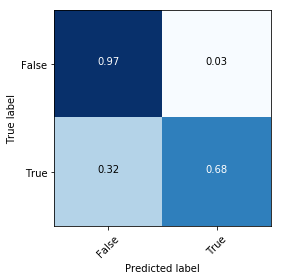

In [29]:
d.plot_confusion_matrix(metrics.confusion_matrix(y_val_bool, y_val_pred), [False, True])

#### Test

In [30]:
y_test_pred = model.predict(x_test)

In [31]:
print('Test Accuracy: %.1f%%' % (metrics.accuracy_score(y_test_pred, y_test_bool) * 100))

Test Accuracy: 77.8%


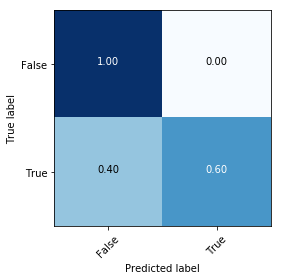

In [32]:
d.plot_confusion_matrix(metrics.confusion_matrix(y_test_bool, y_test_pred), [False, True])

### SVM

#### Train Model

In [33]:
model = svm.SVC(C=10000)
model.fit(x_train, y_train_bool)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
y_train_pred = model.predict(x_train)

In [35]:
print('Training Accuracy: %.1f%%' % (metrics.accuracy_score(y_train_pred, y_train_bool) * 100))

Training Accuracy: 99.1%


#### Validation

In [36]:
y_val_pred = model.predict(x_val)

In [37]:
print('Validation Accuracy: %.1f%%' % (metrics.accuracy_score(y_val_pred, y_val_bool) * 100))

Validation Accuracy: 86.2%


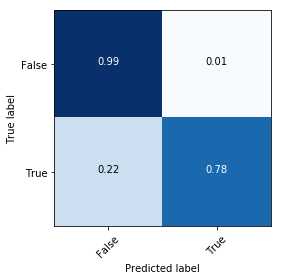

In [38]:
d.plot_confusion_matrix(metrics.confusion_matrix(y_val_bool, y_val_pred), [False, True])

#### Test

In [39]:
y_test_pred = model.predict(x_test)

In [40]:
print('Test Accuracy: %.1f%%' % (metrics.accuracy_score(y_test_pred, y_test_bool) * 100))

Test Accuracy: 83.2%


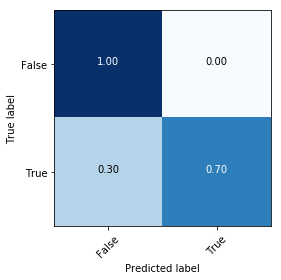

In [41]:
d.plot_confusion_matrix(metrics.confusion_matrix(y_test_bool, y_test_pred), [False, True])

Done!